In [15]:
from fp.traindata_samplers import CompleteData
from fp.missingvalue_handlers import CompleteCaseAnalysis
from fp.missingvalue_handlers import MeanImputer
from fp.missingvalue_handlers import ModeImputer
from fp.dataset_experiments import PSIDDataset #AdultDatasetWhiteExperiment
from fp.scalers import NamedStandardScaler
from fp.learners import LogisticRegression
from fp.pre_processors import NoPreProcessing
from fp.post_processors import NoPostProcessing
from fp.dataset_experiments import AdultDatasetWhiteExperiment

import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image  
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)


# Get experiment data

In [2]:
seed = 12345

_year = "11"
#_protected_attributes= [("hdrace", ["african"]), ("sprace", ["african"])]
_protected_attributes=[("hdrace", ["african", "american indian"]), ("sprace", ["african", "american indian"])]
_protected_attributes_for_classification=["headedu_" + _year, "spedu_" + _year, "hdrace"]

exp = PSIDDataset(
    fixed_random_seed=seed,
    train_data_sampler=CompleteData(),
    missing_value_handler=[CompleteCaseAnalysis(), CompleteCaseAnalysis()],
    numeric_attribute_scaler=NamedStandardScaler(),
    learners=[LogisticRegression()],
    pre_processors=[NoPreProcessing()],
    post_processors=[NoPostProcessing()],
    year=_year, 
    classification_target=("labels1", 2),
    protected_attributes=_protected_attributes,
    protected_attributes_for_classification=_protected_attributes_for_classification)
exp.run()

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


>threshold     13711
NaN             9671
<=threshold     1279
Name: labels1, dtype: int64
TODO
Handle save info.
TODO
Handle save info.
numerical_categorical_dispatcher_complete_case_complete_case removed 16503 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result i

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
2020-05-25 14:46:49,540 [WARNING]  [1.0] listed but not observed for feature eval_hdrace
2020-05-25 14:46:49,543 [WARNING]  [1.0] listed but not observed for feature eval_sprace


numerical_categorical_dispatcher_complete_case_complete_case removed 2361 instances from validation data
Injecting zero columns for features not present {'headedu_11=7.0', 'hdrace=other', 'headedu_11=10.0'}


2020-05-25 14:46:49,844 [WARNING]  [1.0] listed but not observed for feature eval_hdrace
2020-05-25 14:46:49,848 [WARNING]  [1.0] listed but not observed for feature eval_sprace


numerical_categorical_dispatcher_complete_case_complete_case removed 4732 instances from validation data
Injecting zero columns for features not present {'headedu_11=10.0'}


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\aif360\metrics\classification_metric.py:264: RuntimeWarning: invalid value encountered in double_scalars
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\aif360\metrics\classification_metric.py:265: RuntimeWarning: invalid value encountered in double_scalars
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\aif360\metrics\classification_metric.py:632: RuntimeWarning: invalid value encountered in double_scalars
  / self.num_instances(privileged=privileged))
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\aif360\metrics\dataset_metric.py:82: RuntimeWarning: invalid value encountered in double_scalars
  return metric_fun(privileged=False) / metric_fun(privileged=True)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\aif360\metrics\dataset_metric.py:82: RuntimeWarning: divide by zero encountered in double_scalars
  return metric_f

# Analysis of data distributions

In [136]:
# Get the folder with the most recent experiment.

def all_subdirs_of(b='.'):
    result = []
    for d in os.listdir(b):
        bd = os.path.join(b, d)
        if os.path.isdir(bd): 
            result.append(bd)
    return result

def getNbMissingValues(data):
    print("Total number of missing values:", data.isnull().sum().sum())
    print("Missing values per feature:")
    for col in data.columns:
        pct_missing = np.mean(data[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))

def plotMissingValueFeature(list_data, list_names=[], fig_size=(10,10)):
    nb_data = len(list_data)
    if nb_data > 1:
        #fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
        if nb_data % 2 == 0:
            nb_row = int(nb_data/2)
            fig, axs = plt.subplots(nb_row, 2, sharex=True, figsize=fig_size)
        else:
            nb_row = int(nb_data/2+1)
            fig, axs = plt.subplots(nb_row, 2, sharex=True, figsize=fig_size)
        for i in range(nb_data):
            data = list_data[i]
            cols = data.columns
            colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.

            if i % 2 == 0:
                if nb_row == 1:
                    _ax = axs[0]
                else:
                    _ax = axs[int(i/2), 0]
                
                sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours), ax=_ax)#, ax=axs[int(i/2), 0])
                _ax.legend()
                if list_names != []:
                    _ax.set_title(list_names[i])
            else:
                if nb_row == 1:
                    _ax = axs[1]
                else:
                    _ax = axs[int(i/2), 1]
                sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours), ax=_ax)
                if list_names != []:
                    _ax.set_title(list_names[i])
                _ax.legend()
        if nb_data % 2 != 0:
            for l in axs[int(i/2-1),1].get_xaxis().get_majorticklabels():
                l.set_visible(True)
            fig.delaxes(axs[int(i/2), 1])
        fig.show()
    else:
        fig, ax = plt.subplots(figsize=fig_size) 
        
        data = list_data[0]
        cols = data.columns
        colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
        sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours), ax=ax)
        fig.show()
        
def plotMissingValueDistribution(list_df, list_names="", fig_size=(10,10)):
    nb_data = len(list_df)
    if nb_data > 1:
        #fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
        if nb_data % 2 == 0:
            nb_row = int(nb_data/2)
            fig, axs = plt.subplots(nb_row, 2, sharex=True, sharey=True, figsize=fig_size)
        else:
            nb_row = int(nb_data/2+1)
            fig, axs = plt.subplots(nb_row, 2, sharex=True, sharey=True, figsize=fig_size)
        for i in range(nb_data):
            df = list_df[i]
            null_counts = df.isnull().sum()/len(df)
            if i % 2 == 0:
                if nb_row == 1:
                    _ax = axs[0]
                else:
                    _ax = axs[int(i/2), 0]                   
            else:
                if nb_row == 1:
                    _ax = axs[1]
                else:
                    _ax = axs[int(i/2), 1]
            #plt.figure(figsize=(10,8))
            _ax.set_xticks(np.arange(len(null_counts))+0.5)
            _ax.set_xticklabels( list(null_counts.index))
            _ax.set_ylabel('fraction of rows with missing data')
            _ax.bar(np.arange(len(null_counts)),null_counts)
            _ax.legend()
            plt.setp(_ax.get_xticklabels(), rotation='vertical')
            if list_names != []:
                _ax.set_title(list_names[i])
        if nb_data % 2 != 0:
            for l in axs[int(i/2-1),1].get_xaxis().get_majorticklabels():
                l.set_visible(True)
            fig.delaxes(axs[int(i/2), 1])
        fig.show()
        
    else:
        df = list_df[0]
        null_counts = df.isnull().sum()/len(df)
        fig, ax = plt.subplots(figsize=fig_size) 
        ax.set_xticks(np.arange(len(null_counts))+0.5)
        ax.set_xticklabels( list(null_counts.index))
        ax.set_ylabel('fraction of rows with missing data')
        ax.bar(np.arange(len(null_counts)),null_counts)
        ax.legend()
        plt.setp(ax.get_xticklabels(), rotation='vertical')

In [95]:
latest_subdir = max(all_subdirs_of("logs/"), key=os.path.getmtime)

# Get data raw
#data = pd.read_csv(glob.glob(latest_subdir + "/*-raw_training_data_distribution.csv")[0], index_col="Unnamed: 0")

# Get data sampled 
data = pd.read_csv(glob.glob(latest_subdir + "/*-raw_training_data_sampled_distribution.csv")[0], index_col="Unnamed: 0")


In [96]:
data.shape

(17262, 34)

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


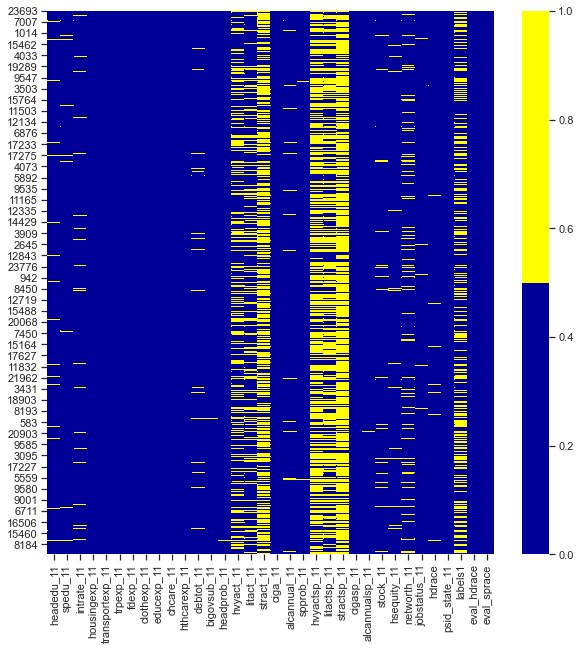

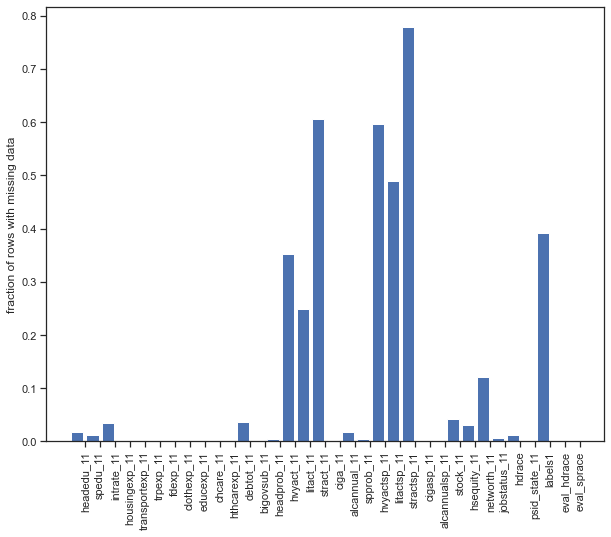

In [97]:
# Distribution per attribute.

#getNbMissingValues(data)
plotMissingValueFeature([data])
plotMissingValueDistribution(data)

In [152]:
# Distribution per attribute and per protected attribute.

# Get protected attributes.
protected_attributes = {}
for col_names in list(data.columns):
    if "eval_" in col_names:
        protected_attributes[col_names] = {"protected":[], "not_protected":[]}
# Get protected and non-protected values for each attribute.
for key in protected_attributes:
    # Get unique values.
    unique_values_series = data[key].value_counts(dropna=False)
    attribute_values = (list(unique_values_series.index))
    for attribute_name in attribute_values:
        if "not" in attribute_name:
            protected_attributes[key]["not_protected"].append(attribute_name)
        elif attribute_name == np.nan:
            protected_attributes[key]["not_protected"].append(attribute_name)
        else:
            protected_attributes[key]["protected"].append(attribute_name)

def createBinaryCondition(protected_attributes, data):
    condition_binary = True
    for element in protected_attributes:
        print(element)
        print(protected_attributes[element]["protected"])
        condition_binary = condition_binary & (data[element].isin(protected_attributes[element]["protected"]))
    return condition_binary
            
# Prepare the two datasets with protected/not protected.
binary_condition = createBinaryCondition(protected_attributes, data)
data_list_binary = [data.loc[binary_condition], data.loc[~binary_condition]]
data_name_binary = ["Protected elements", "Not protected elements"]
            
# Prepare the list of dataframes separated by the different types of attributes.            
def create4_4Conditions(protected_attributes, data):
    list_protected_attributes = list(protected_attributes.keys())
    print(list_protected_attributes)
    list_condition = [(data[list_protected_attributes[0]].isin(protected_attributes[list_protected_attributes[0]]["protected"]) & data[list_protected_attributes[1]].isin(protected_attributes[list_protected_attributes[1]]["protected"])), \
                     (data[list_protected_attributes[0]].isin(protected_attributes[list_protected_attributes[0]]["protected"]) & data[list_protected_attributes[1]].isin(protected_attributes[list_protected_attributes[1]]["not_protected"])),\
                     (data[list_protected_attributes[0]].isin(protected_attributes[list_protected_attributes[0]]["not_protected"]) & data[list_protected_attributes[1]].isin(protected_attributes[list_protected_attributes[1]]["protected"])),\
                     (data[list_protected_attributes[0]].isin(protected_attributes[list_protected_attributes[0]]["not_protected"]) & data[list_protected_attributes[1]].isin(protected_attributes[list_protected_attributes[1]]["not_protected"]))]
    condition_names = [list_protected_attributes[0] + protected_attributes[list_protected_attributes[0]]["protected"][0] + list_protected_attributes[1] + protected_attributes[list_protected_attributes[1]]["protected"][0],\
                      list_protected_attributes[0] + protected_attributes[list_protected_attributes[0]]["protected"][0] + list_protected_attributes[1] + protected_attributes[list_protected_attributes[1]]["not_protected"][0],\
                      list_protected_attributes[0] + protected_attributes[list_protected_attributes[0]]["not_protected"][0] + list_protected_attributes[1] + protected_attributes[list_protected_attributes[1]]["protected"][0],\
                      list_protected_attributes[0] + protected_attributes[list_protected_attributes[0]]["not_protected"][0] + list_protected_attributes[1] + protected_attributes[list_protected_attributes[1]]["not_protected"][0]]
    return list_condition, condition_names

list_condition, condition_names = create4_4Conditions(protected_attributes, data)
data_list_4 = []
data_name_4 = []
for cond, nm in zip(list_condition, condition_names):
    data_list_4.append(data.loc[cond])
    data_name_4.append(nm)

eval_hdrace
['african_american indian']
eval_sprace
['african_american indian']
['eval_hdrace', 'eval_sprace']


2020-05-25 19:16:58,461 [WARNING]  No handles with labels found to put in legend.
2020-05-25 19:17:00,092 [WARNING]  No handles with labels found to put in legend.
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


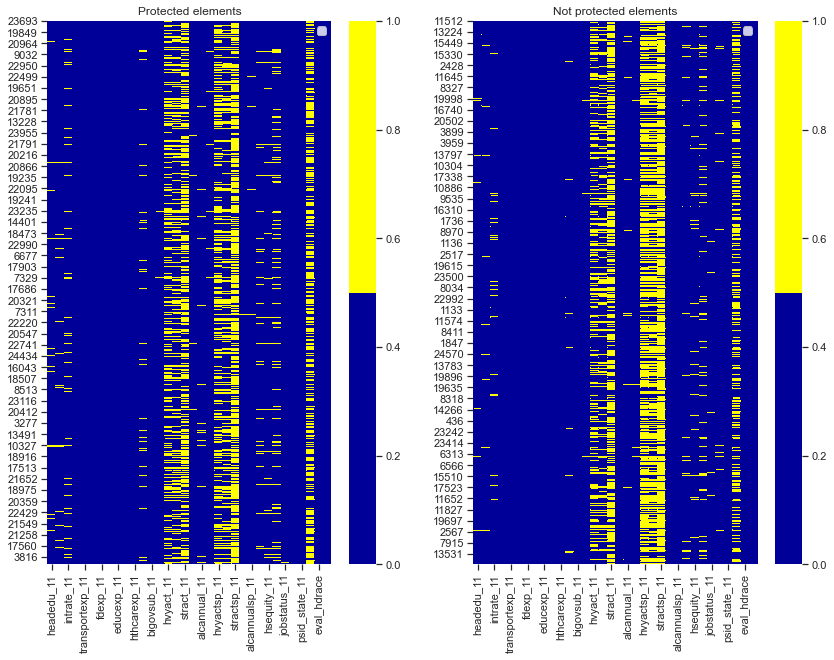

In [150]:
plotMissingValueFeature(data_list_binary, list_names=data_name_binary, fig_size=(14,10))

2020-05-25 18:59:58,709 [WARNING]  No handles with labels found to put in legend.
2020-05-25 18:59:58,778 [WARNING]  No handles with labels found to put in legend.
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\ipykernel_launcher.py:102: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


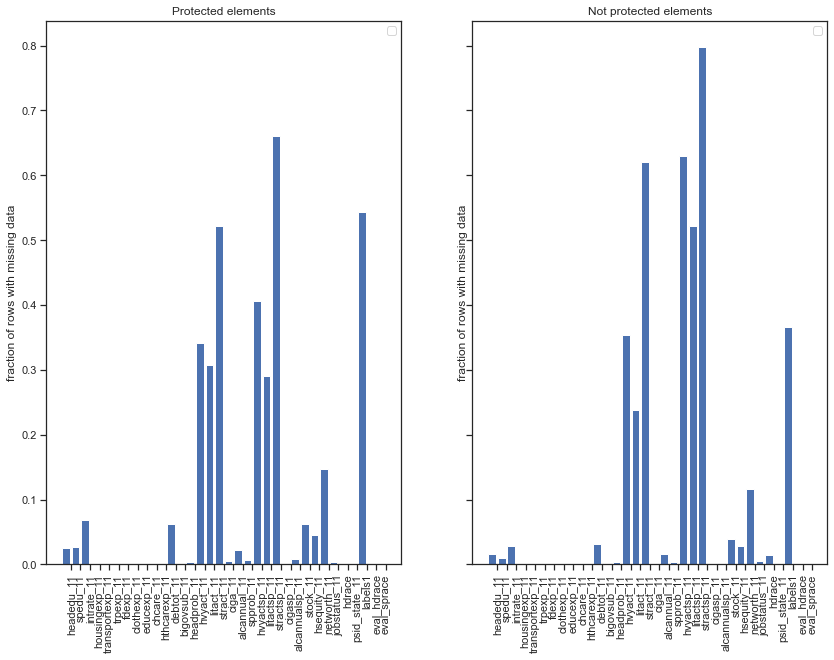

In [137]:
plotMissingValueDistribution(data_list_binary, list_names=data_name_binary,fig_size=(14,10))

2020-05-25 19:18:49,731 [WARNING]  No handles with labels found to put in legend.
2020-05-25 19:18:51,324 [WARNING]  No handles with labels found to put in legend.
2020-05-25 19:18:53,389 [WARNING]  No handles with labels found to put in legend.
2020-05-25 19:18:54,466 [WARNING]  No handles with labels found to put in legend.
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


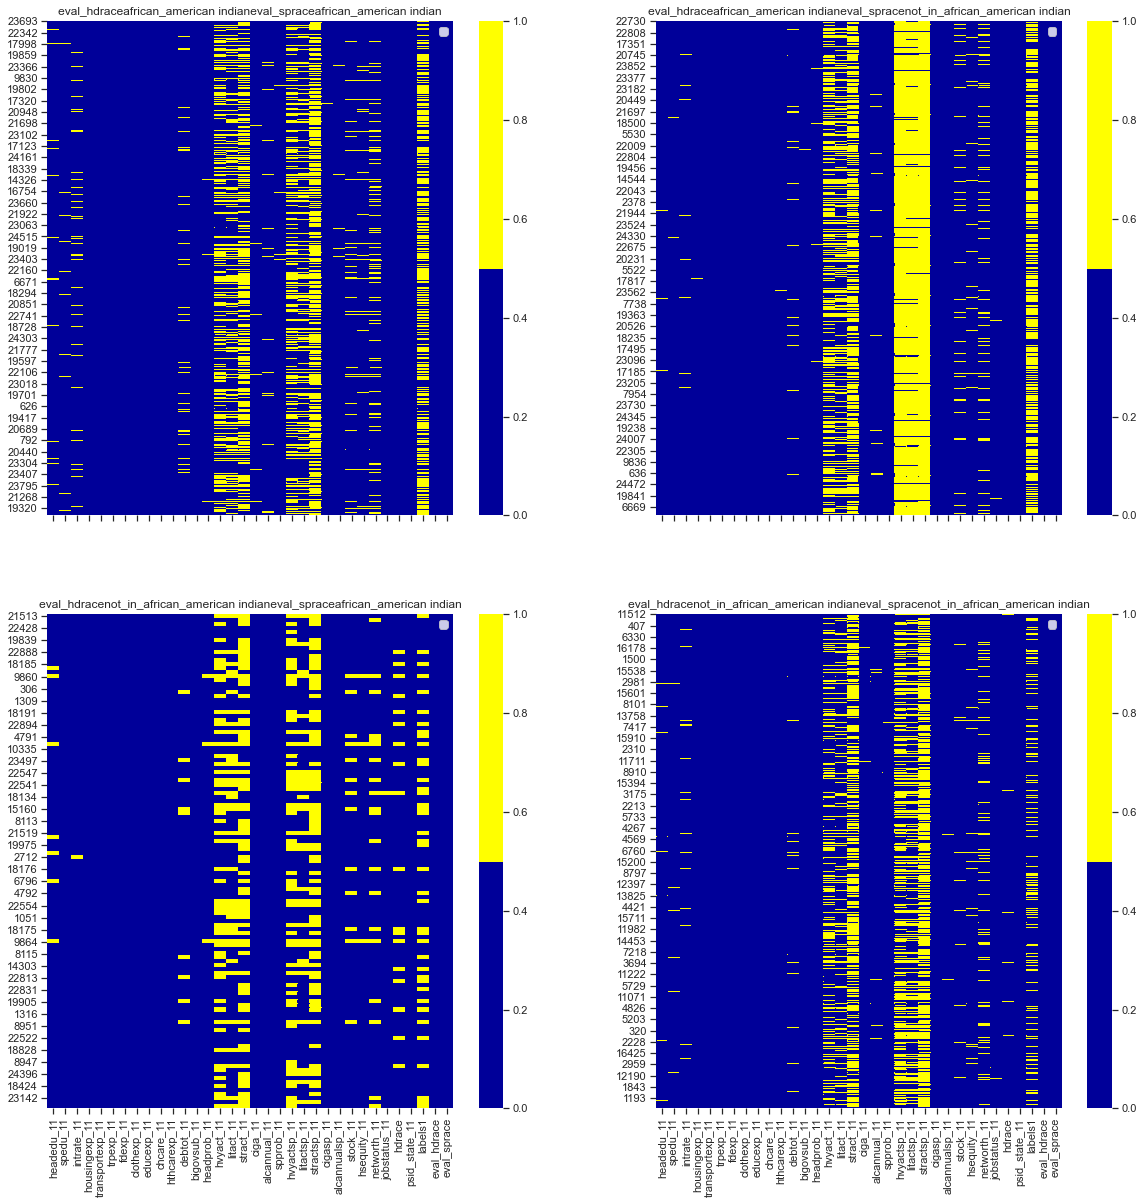

In [156]:
plotMissingValueFeature(data_list_4, list_names=data_name_4, fig_size=(20,20))

2020-05-25 19:18:25,663 [WARNING]  No handles with labels found to put in legend.
2020-05-25 19:18:25,731 [WARNING]  No handles with labels found to put in legend.
2020-05-25 19:18:25,791 [WARNING]  No handles with labels found to put in legend.
2020-05-25 19:18:25,864 [WARNING]  No handles with labels found to put in legend.
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\ipykernel_launcher.py:102: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


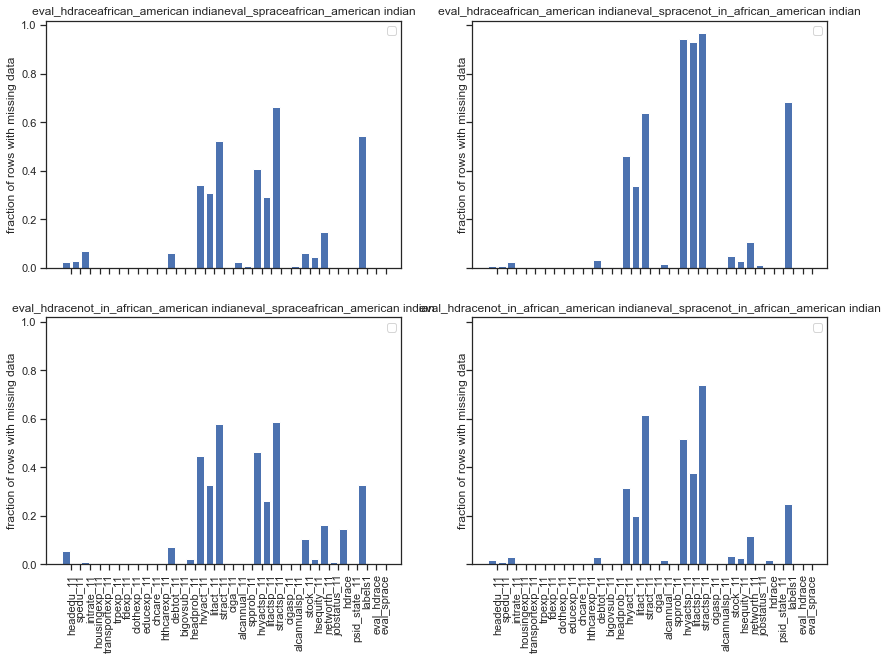

In [155]:
plotMissingValueDistribution(data_list_4, list_names=data_name_4,fig_size=(14,10))

# Analysis of results

In [162]:
# Get results
latest_subdir = max(all_subdirs_of("logs/"), key=os.path.getmtime)

# Get data raw
#data = pd.read_csv(glob.glob(latest_subdir + "/*-raw_training_data_distribution.csv")[0], index_col="Unnamed: 0")

# Get data sampled 
data = pd.read_csv(glob.glob(latest_subdir + "/*_OPTIMAL.csv")[0], header=None, \
                  names=["data_split", "protected_type", "metric", "measure"])
# Boolean prescribing whether to condition this metric on the `privileged_groups`, 
# if `True`, or the `unprivileged_groups`, if `False`. 
# Defaults to `None` meaning this metric is computed over the entire dataset.

In [163]:
data

,data_split,protected_type,metric,measure
0,val,None,num_true_positives,103.000000
1,val,None,num_false_positives,1.000000
2,val,None,num_false_negatives,0.000000
3,val,None,num_true_negatives,1.000000
4,val,None,num_generalized_true_positives,0.000000
5,val,None,num_generalized_false_positives,0.999989
6,val,None,num_generalized_false_negatives,103.000000
7,val,None,num_generalized_true_negatives,1.000011
8,val,None,true_positive_rate,1.000000
9,val,None,false_positive_rate,0.500000


In [206]:
# Select what you want to observe
data_split = "test"

#protected_type = [None, True, False]
split_metric = ["true_positive_rate", "false_positive_rate", "accuracy" ]

general_metric = ["disparate_impact", "statistical_parity_difference", "error_rate_difference", "true_positive_rate_difference"]

#data["metric"].value_counts()
# Disparate impact: It compares the proportion of individuals that receive a positive output 
# statistical parity: A classifier satisfies this definition if subjects in both protected and \
# unprotected groups have equal probability of being assigned to the positive predicted class

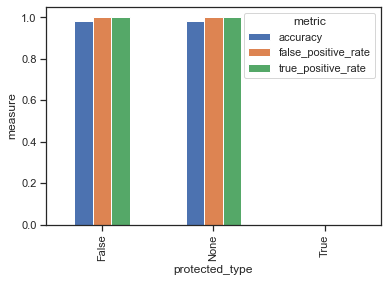

In [207]:
# Get the data
data_for_plot = data.loc[(data["data_split"] == data_split) & (data["metric"].isin(split_metric))]# (data["protected_type"].isin(protected_type))]# & (data["metric"].isin(split_metric))]
#data.loc[ (data["protected_type"] )]
#data_for_plot["metric type"] = data_for_plot["protected_type"].astype(str) + "_"+ data_for_plot["metric"]

#data_for_plot.plot(kind='bar', x='metric type', y='measure')


groupby_metric_type = data_for_plot.groupby(["protected_type", "metric"])
aggregate_groupby = groupby_metric_type['measure'].aggregate(np.sum).unstack()
aggregate_groupby.plot(kind = "bar", title = "")
plt.ylabel("measure")
plt.show()
#data_for_plot[["legend", "measure"]].plot(kind="bar", legend=True)

    data_split protected_type                         metric   measure
276       test            NaN  true_positive_rate_difference       NaN
287       test            NaN          error_rate_difference -0.985075
289       test            NaN               disparate_impact       NaN
290       test            NaN  statistical_parity_difference       NaN


Text(0, 0.5, 'score')

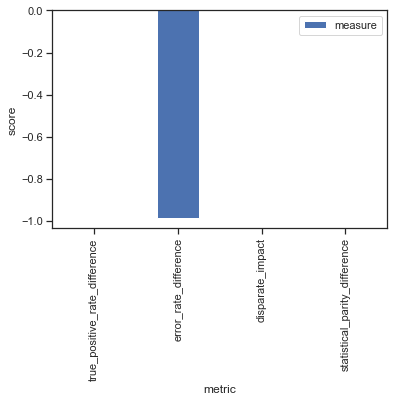

In [209]:
#data_for_plot = data.loc[(data["protected_type"] == np.nan) & (data["data_split"] == data_split) & (data["metric"].isin(general_metric))]# (data["protected_type"].isin(protected_type))]# & (data["metric"].isin(split_metric))]

data_for_plot = data.loc[(data["data_split"] == data_split) & (data["metric"].isin(general_metric))]# (data["protected_type"].isin(protected_type))]# & (data["metric"].isin(split_metric))]
print(data_for_plot)
data_for_plot.plot(kind='bar', x='metric', y='measure')
plt.ylabel("score")